<a href="https://colab.research.google.com/github/gaurav-26-11/COVID-19-Risk-Identifier-ML-Model/blob/visualization/visualization_of_COVID_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Covid Dataset.csv to Covid Dataset (1).csv


#LOADING DATA

In [ ]:
df2=pd.read_csv("Covid Dataset.csv")
df2

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


#DATA CLEANING

In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [ ]:
df2['Breathing Problem']=e.fit_transform(df2['Breathing Problem'])
df2['Fever']=e.fit_transform(df2['Fever'])
df2['Dry Cough']=e.fit_transform(df2['Dry Cough'])
df2['Sore throat']=e.fit_transform(df2['Sore throat'])
df2['Running Nose']=e.fit_transform(df2['Running Nose'])
df2['Asthma']=e.fit_transform(df2['Asthma'])
df2['Chronic Lung Disease']=e.fit_transform(df2['Chronic Lung Disease'])
df2['Headache']=e.fit_transform(df2['Headache'])
df2['Heart Disease']=e.fit_transform(df2['Heart Disease'])
df2['Diabetes']=e.fit_transform(df2['Diabetes'])
df2['Hyper Tension']=e.fit_transform(df2['Hyper Tension'])
df2['Abroad travel']=e.fit_transform(df2['Abroad travel'])
df2['Contact with COVID Patient']=e.fit_transform(df2['Contact with COVID Patient'])
df2['Attended Large Gathering']=e.fit_transform(df2['Attended Large Gathering'])
df2['Visited Public Exposed Places']=e.fit_transform(df2['Visited Public Exposed Places'])
df2['Family working in Public Exposed Places']=e.fit_transform(df2['Family working in Public Exposed Places'])
df2['Wearing Masks']=e.fit_transform(df2['Wearing Masks'])
df2['Sanitization from Market']=e.fit_transform(df2['Sanitization from Market'])
df2['COVID-19']=e.fit_transform(df2['COVID-19'])
df2['Dry Cough']=e.fit_transform(df2['Dry Cough'])
df2['Sore throat']=e.fit_transform(df2['Sore throat'])
df2['Gastrointestinal ']=e.fit_transform(df2['Gastrointestinal '])
df2['Fatigue ']=e.fit_transform(df2['Fatigue '])

In [ ]:
df2

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

#EDA ANALYSIS

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Breathing Problem,5434.0,0.666176,0.471621,0.0,0.0,1.0,1.0,1.0
Fever,5434.0,0.786345,0.409924,0.0,1.0,1.0,1.0,1.0
Dry Cough,5434.0,0.792602,0.405480,0.0,1.0,1.0,1.0,1.0
Sore throat,5434.0,0.727457,0.445309,0.0,0.0,1.0,1.0,1.0
Running Nose,5434.0,0.543246,0.498172,0.0,0.0,1.0,1.0,1.0
Asthma,5434.0,0.462643,0.498648,0.0,0.0,0.0,1.0,1.0
Chronic Lung Disease,5434.0,0.472028,0.499263,0.0,0.0,0.0,1.0,1.0
Headache,5434.0,0.503497,0.500034,0.0,0.0,1.0,1.0,1.0
Heart Disease,5434.0,0.464299,0.498770,0.0,0.0,0.0,1.0,1.0
Diabetes,5434.0,0.476261,0.499482,0.0,0.0,0.0,1.0,1.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [ ]:
df2.shape

(5434, 21)

In [ ]:
#to check no of unique values in each column
df2.nunique()

Breathing Problem                          2
Fever                                      2
Dry Cough                                  2
Sore throat                                2
Running Nose                               2
Asthma                                     2
Chronic Lung Disease                       2
Headache                                   2
Heart Disease                              2
Diabetes                                   2
Hyper Tension                              2
Fatigue                                    2
Gastrointestinal                           2
Abroad travel                              2
Contact with COVID Patient                 2
Attended Large Gathering                   2
Visited Public Exposed Places              2
Family working in Public Exposed Places    2
Wearing Masks                              1
Sanitization from Market                   1
COVID-19                                   2
dtype: int64

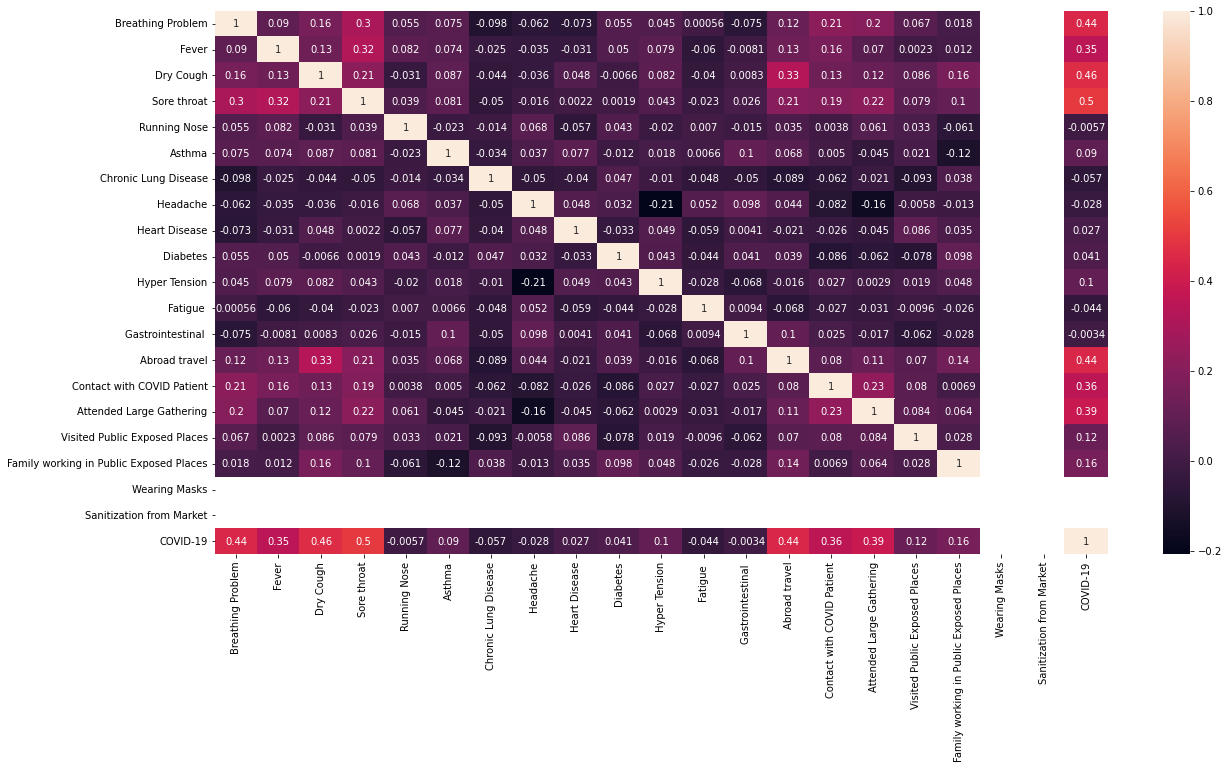

In [ ]:
correlation=df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

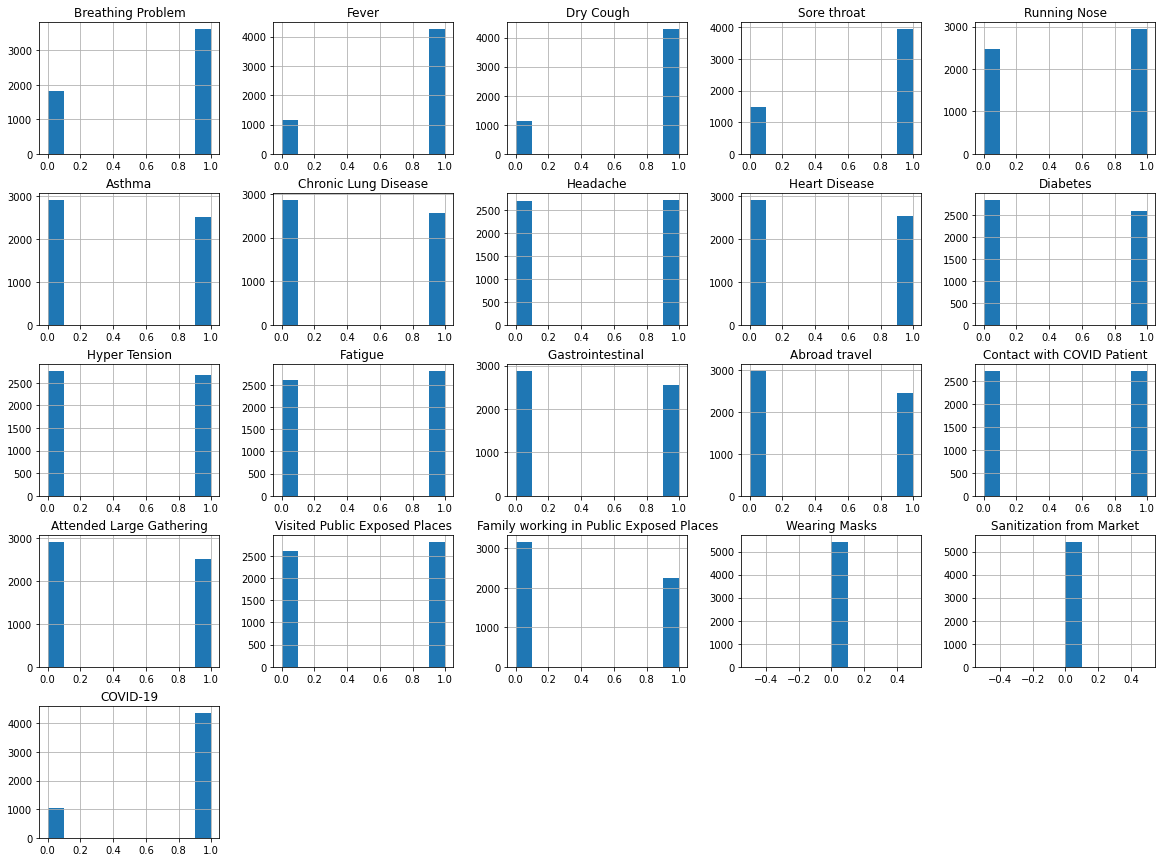

In [ ]:
df2.hist(figsize=(20,15));


#DATA PRE-PROCESSING

In [ ]:
df2=df2.drop('Running Nose',axis=1)
df2=df2.drop('Chronic Lung Disease',axis=1)
df2=df2.drop('Headache',axis=1)
df2=df2.drop('Heart Disease',axis=1)
df2=df2.drop('Diabetes',axis=1)
df2=df2.drop('Gastrointestinal ',axis=1)
df2=df2.drop('Asthma',axis=1)
df2=df2.drop('Fatigue ',axis=1)  

In [ ]:
df2

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,0,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,0,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,0,0,0,0,0,0,0,1
5431,1,1,1,0,1,0,0,0,0,0,0,0,0
5432,1,1,1,0,0,0,0,0,0,0,0,0,0


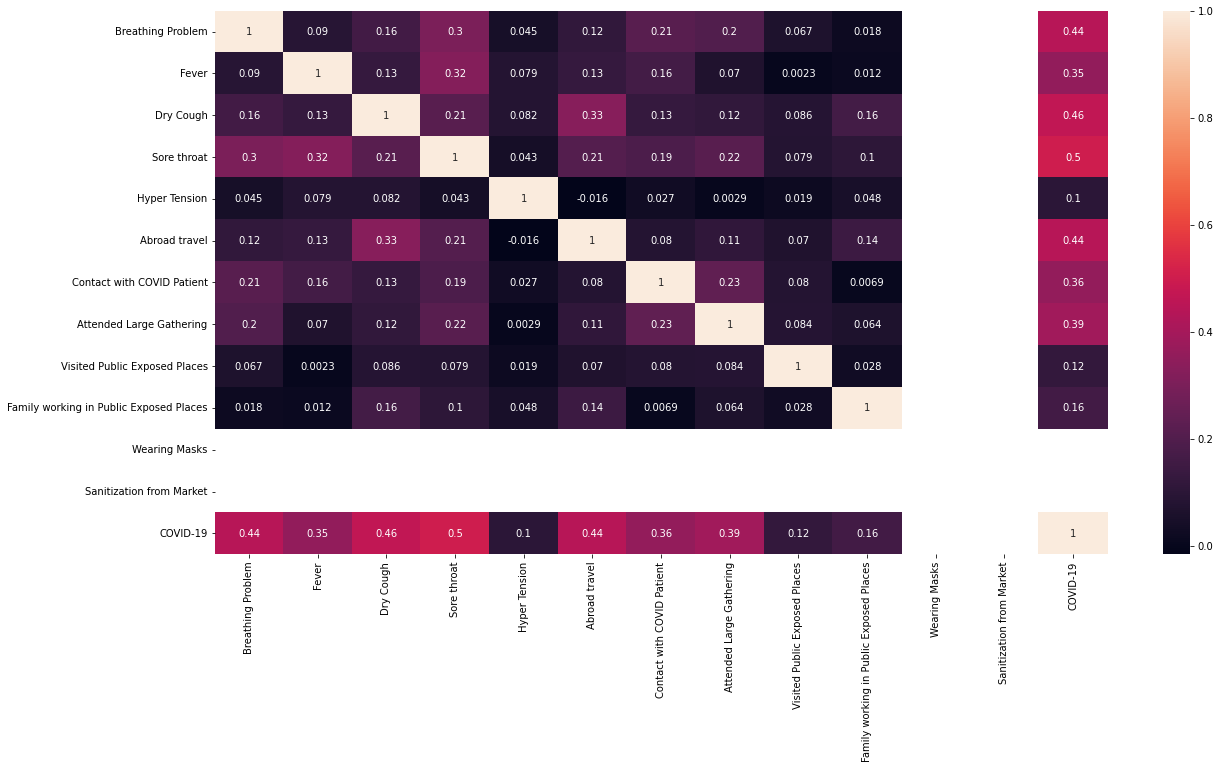

In [ ]:
correlation=df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

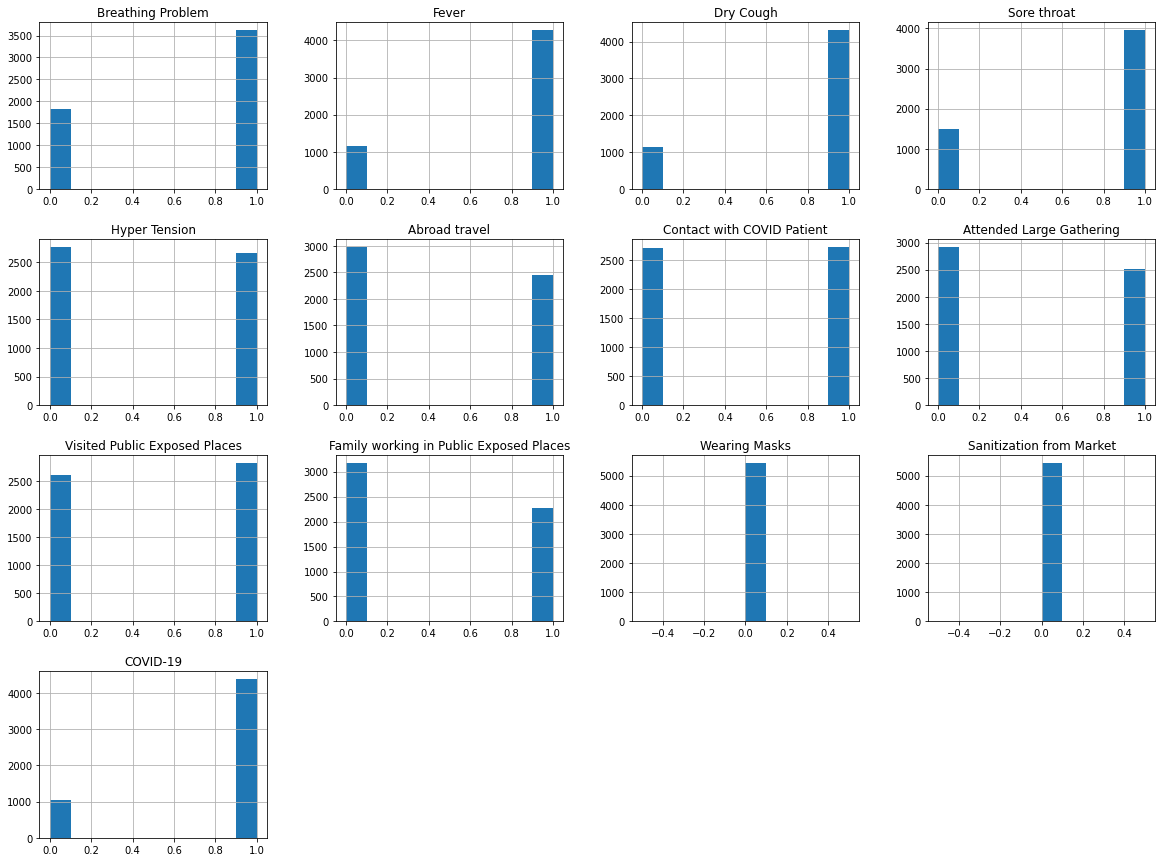

In [ ]:
df2.hist(figsize=(20,15));


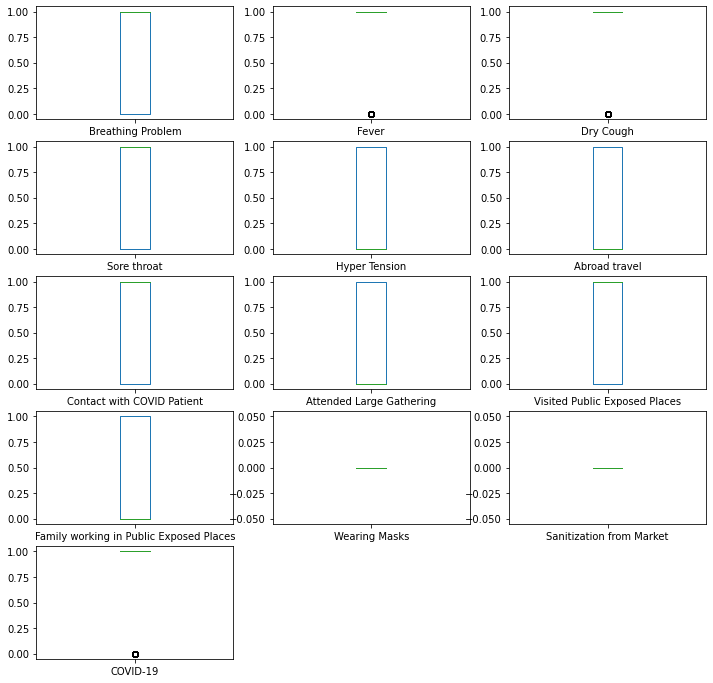

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df2.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

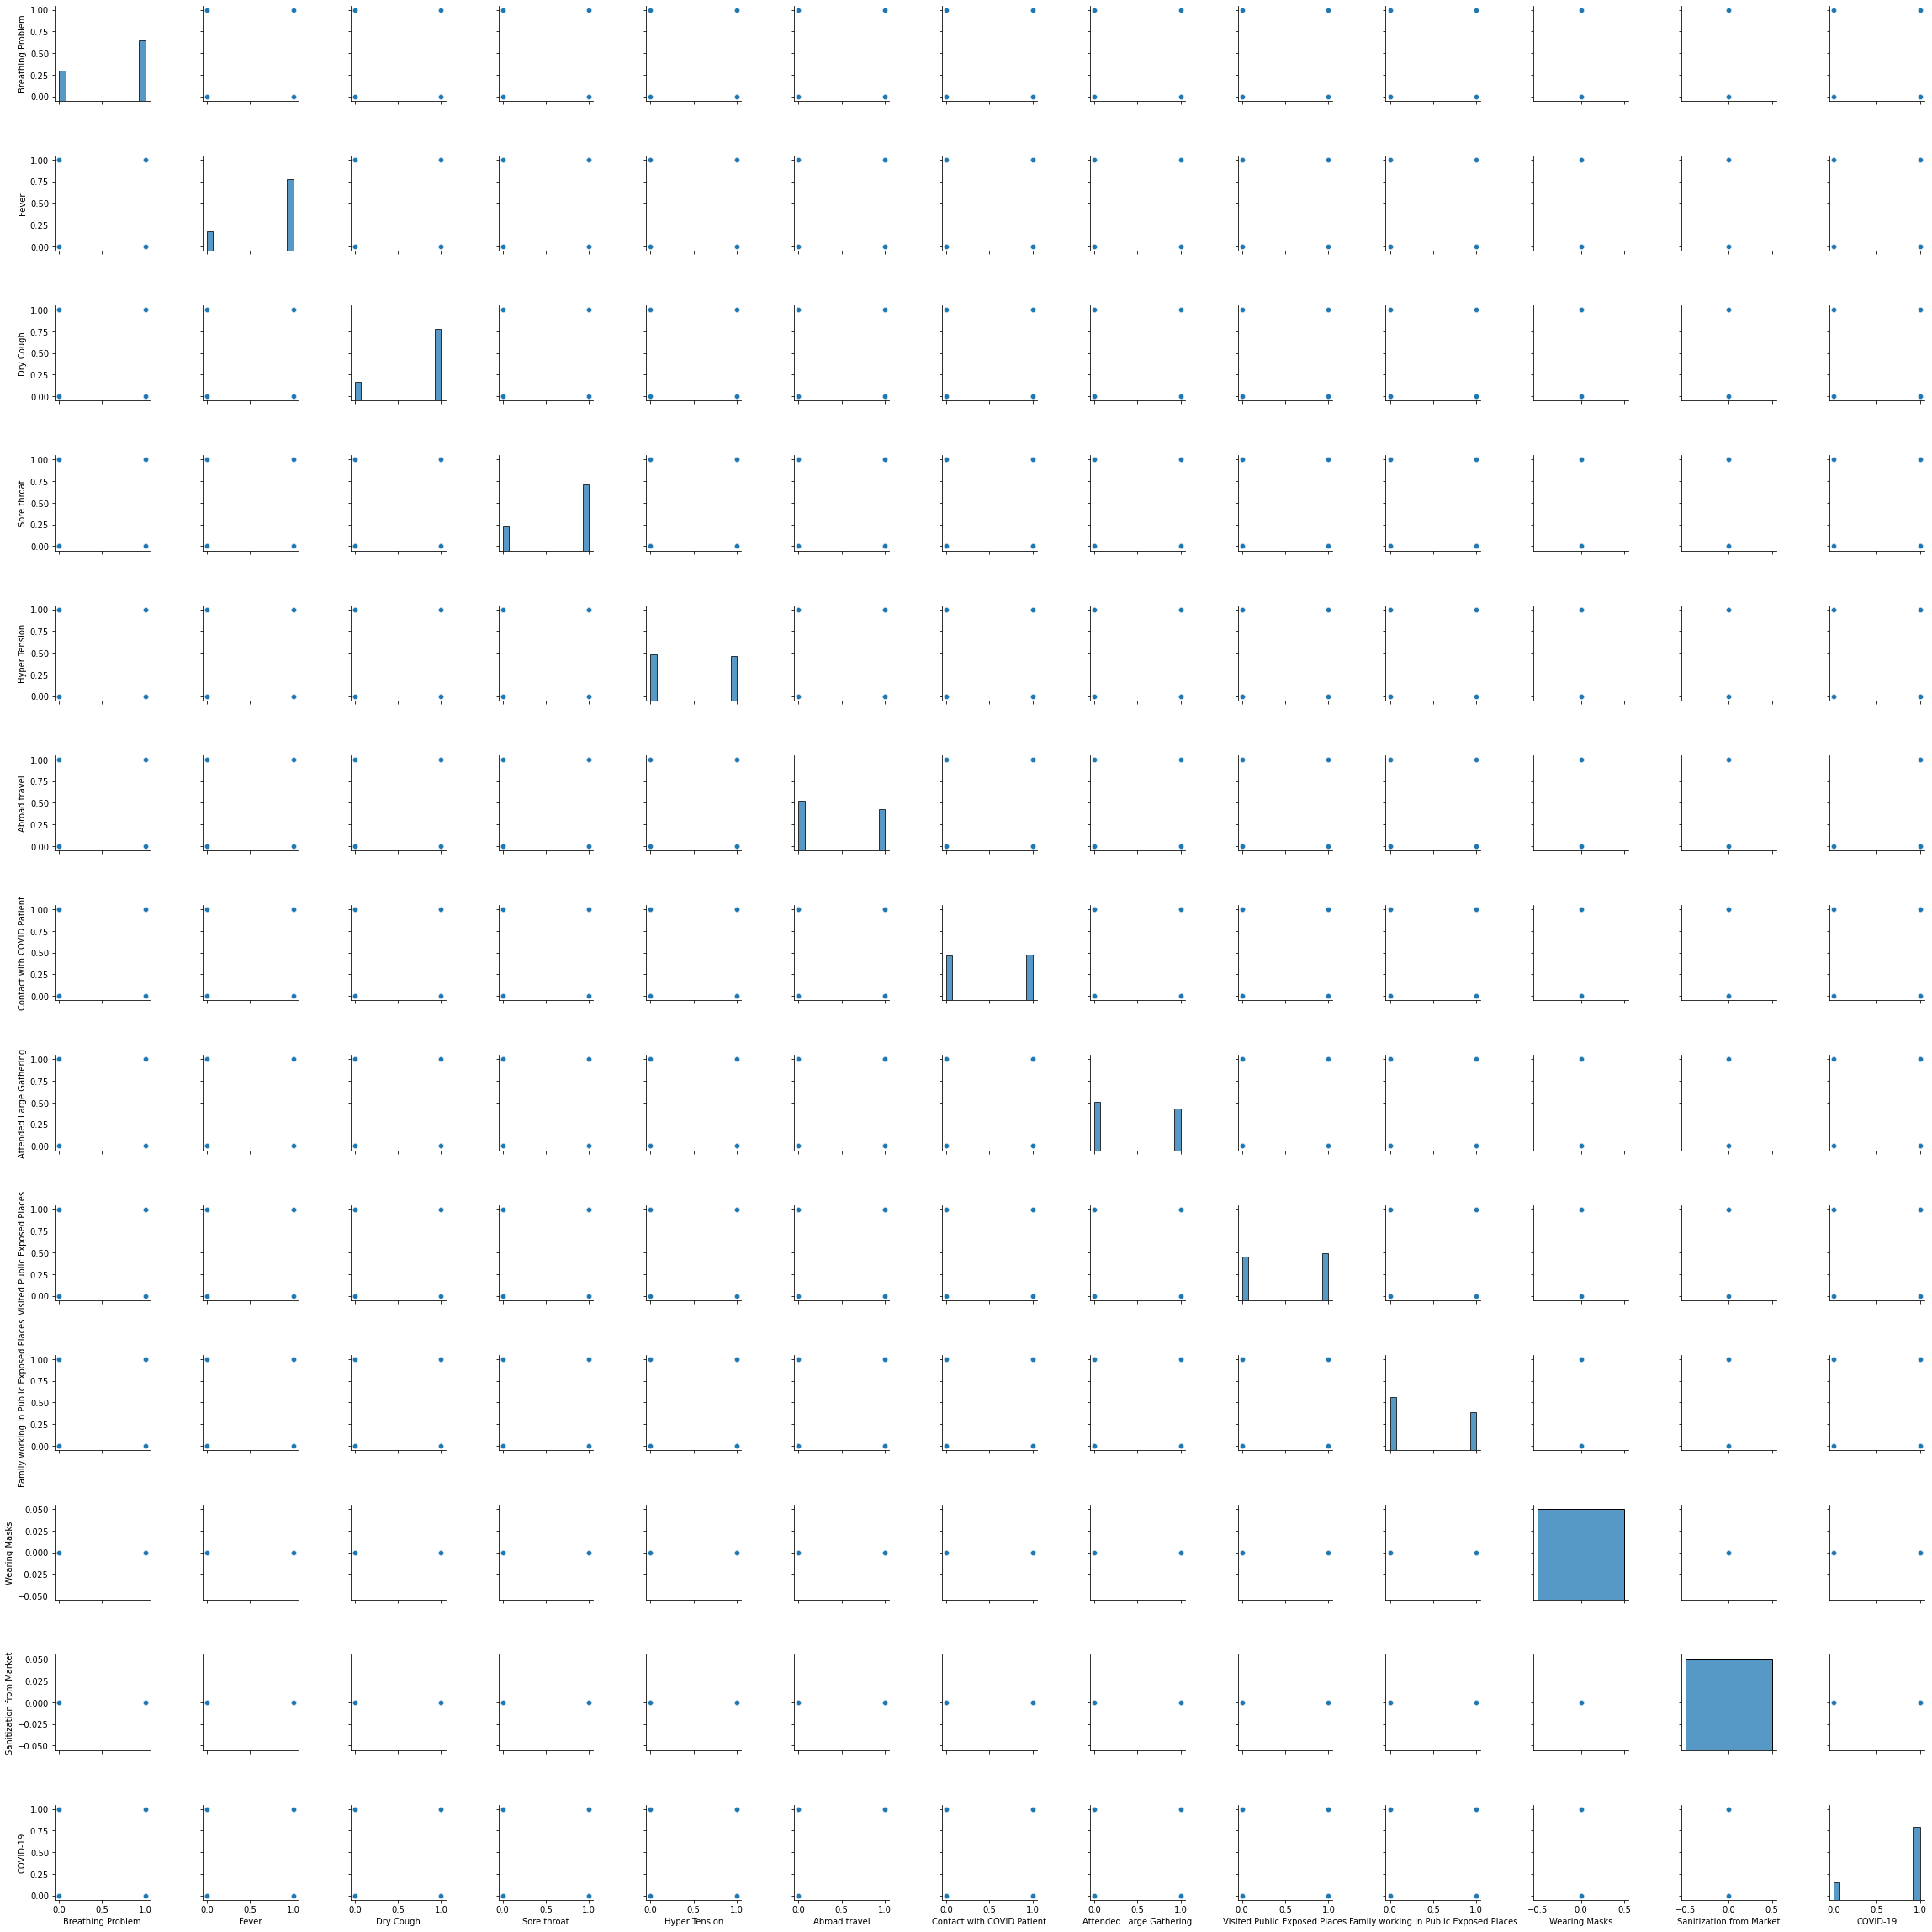

In [ ]:
sns.pairplot(data=df2)

#DATA TO FEED ML MODEL

In [ ]:
y=df2["COVID-19"] #target coloumn
y

0       1
1       1
2       1
3       1
4       1
       ..
5429    1
5430    1
5431    0
5432    0
5433    0
Name: COVID-19, Length: 5434, dtype: int64

In [ ]:
X=df2.drop("COVID-19",axis=1) #feature coloumn
X

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,1,1,1,1,1,0,1,0,1,1,0,0
1,1,1,1,1,0,0,0,1,1,0,0,0
2,1,1,1,1,0,1,0,0,0,0,0,0
3,1,1,1,0,0,1,0,1,1,0,0,0
4,1,1,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,0,0,0,0,0,0,0,0
5430,1,1,1,0,1,0,0,0,0,0,0,0
5431,1,1,1,0,1,0,0,0,0,0,0,0
5432,1,1,1,0,0,0,0,0,0,0,0,0


#TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

#TRANSFORMATION OF DATA TO FEED ML ALGOs

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#ML MODEL 

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train) #training the model
model.score(X_test,y_test)
  

0.9638258736971184

In [ ]:
y_predicted=model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 291,   24],
       [  35, 1281]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predicted, average='weighted')

(0.9644259244295017, 0.9638258736971184, 0.9640603510377854, None)

In [ ]:
data=pd.DataFrame({0:[1],1:[0],2:[1],3:[1],4:[1],5:[1],6:[1],7:[1],8:[1],9:[1],10:[1],11:[1]})
model.predict(data)

array([1])

#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9717964438994482

In [ ]:
y_predicted=model2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 291,   24],
       [  22, 1294]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predicted, average='weighted')

(0.9717325835294398, 0.9717964438994482, 0.9717622412786867, None)

In [ ]:
data=pd.DataFrame({0:[1],1:[0],2:[1],3:[1],4:[1],5:[1],6:[1],7:[1],8:[1],9:[1],10:[1],11:[1]})
model.predict(data)

array([1])

In [ ]:
data=pd.DataFrame({0:[1],1:[0],2:[1],3:[1],4:[1],5:[1],6:[1],7:[1],8:[1],9:[1],10:[1],11:[1]})
model.predict(data)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 7000)
regressor.fit(X_train,y_train)
regressor.score(X_train,y_train)

0.9771233236918222

In [ ]:
y_predicted=regressor.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 284,   31],
       [  16, 1300]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predicted, average='weighted')

(0.9709070272117837, 0.9711833231146536, 0.9709135492914068, None)

In [ ]:
data=pd.DataFrame({0:[1],1:[0],2:[1],3:[1],4:[1],5:[1],6:[1],7:[1],8:[1],9:[1],10:[1],11:[1]})
model.predict(data)

array([1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accu=0.0
finalk=0
for i in range(0,30):
  model=KNeighborsClassifier(n_neighbors=i)
  #model=KNeighborsClassifier(n_neighbors=4)
  model.fit(X_train,y_train) #training the model
  if accu < model.score(X_test,y_test):
    accu= model.score(X_test,y_test)
    finalk=i
print (k)
print (accu)